<a href="https://colab.research.google.com/github/Chioma-Nwandiko/Energy-Dataset/blob/master/Energy_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Gathering**

In [1]:
#importing all necessary packages 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# importing the energy datasets
sheet='https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv'
data_set=pd.read_csv(sheet)


In [3]:
#renaming some columns for clarity

column_name={'T1':'kitchen_temp',
             'RH_1': 'kitchen_humidity',
             'T2': 'living_rm_temp',
             'RH_2': 'living_rm_humidity',
             'T3': 'laundry_rm_temp',
             'RH_3': 'laundry_rm_humidity',
             'T4': 'office_rm_temp',
             'RH_4': 'office_rm_humidity',
             'T5': 'bath_rm_temp',
             'RH_5': 'bath_rm_humidity',
             'T6': 'northside_temp',
             'RH_6': 'northside_humidity',
             'T7': 'ironing_rm_temp',
             'RH_7': 'ironing_rm_humidity',
             'T8': 'teenage_rm_temp',
             'RH_8': 'teenage_rm_humidity',
             'T9': 'parents_rm_temp',
             'RH_9': 'parents_rm_humidity',
             'T_out': 'outside_temp',
             'RH_out': 'outside_humidity',
               }
data_set= data_set.rename(columns= column_name)
#viewing the 1st 5 rows to view the new column names
data_set.head() 

,date,Appliances,lights,kitchen_temp,kitchen_humidity,living_rm_temp,living_rm_humidity,laundry_rm_temp,laundry_rm_humidity,office_rm_temp,office_rm_humidity,bath_rm_temp,bath_rm_humidity,northside_temp,northside_humidity,ironing_rm_temp,ironing_rm_humidity,teenage_rm_temp,teenage_rm_humidity,parents_rm_temp,parents_rm_humidity,outside_temp,Press_mm_hg,outside_humidity,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


## **Exploratory Data Analysis**

In [4]:
#to know the length and if there's any NAN value in this data

data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 19735 non-null  object 
 1   Appliances           19735 non-null  int64  
 2   lights               19735 non-null  int64  
 3   kitchen_temp         19735 non-null  float64
 4   kitchen_humidity     19735 non-null  float64
 5   living_rm_temp       19735 non-null  float64
 6   living_rm_humidity   19735 non-null  float64
 7   laundry_rm_temp      19735 non-null  float64
 8   laundry_rm_humidity  19735 non-null  float64
 9   office_rm_temp       19735 non-null  float64
 10  office_rm_humidity   19735 non-null  float64
 11  bath_rm_temp         19735 non-null  float64
 12  bath_rm_humidity     19735 non-null  float64
 13  northside_temp       19735 non-null  float64
 14  northside_humidity   19735 non-null  float64
 15  ironing_rm_temp      19735 non-null 

From the information, we can see that:

1.   The length of 19735 (range index)
2.   The features are 26-floats, 2-integers and 1-objects
1.   This shows there are 19735 rows and 29 columns and no null vlaues in this set







In [5]:
data_set.describe()

,Appliances,lights,kitchen_temp,kitchen_humidity,living_rm_temp,living_rm_humidity,laundry_rm_temp,laundry_rm_humidity,office_rm_temp,office_rm_humidity,bath_rm_temp,bath_rm_humidity,northside_temp,northside_humidity,ironing_rm_temp,ironing_rm_humidity,teenage_rm_temp,teenage_rm_humidity,parents_rm_temp,parents_rm_humidity,outside_temp,Press_mm_hg,outside_humidity,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


**Observations**

1. Temperature Columns- From the table, it is observed that when the min temp outside is -6.065 deg celcius, all temp within the house is below the 26 deg.cel showing that the period of observation was during a cold period
2. Appliances- The max number of appliances is 1080 which could be as a result of whenever the temp dropped to min temp and reduced to 10 when the temp increased to max temp
3. Humidity- From the table, humidity is inversely proportional to temperature, that is, when there's a high humid percentage (63.6), a low temperature(16.79) would follow suit and vice versa for when the humid is low





In [6]:
#inspecting the target variable

data_set['Appliances'].value_counts().sort_values()

1070       1
880        1
830        1
910        1
840        1
        ... 
80      1205
70      1560
40      2019
60      3282
50      4368
Name: Appliances, Length: 92, dtype: int64

In [7]:
data_set.drop(['date','lights'], axis=1, inplace= True)

From the instruction, dropping date and lights column since they dont impact on the set

In [12]:
#confirming the new number of rows after dropping date and lights columns

data_set.shape

(19735, 27)

# **Data Visualisation**

In [13]:
#finding the correlation between the features

corr=data_set.corr()

#showing the number of rows and column that coorelate
corr.shape 

(27, 27)

The heat map below shows the correlation between features, the closer the value is to 1, the higher the correlation between the pair of features


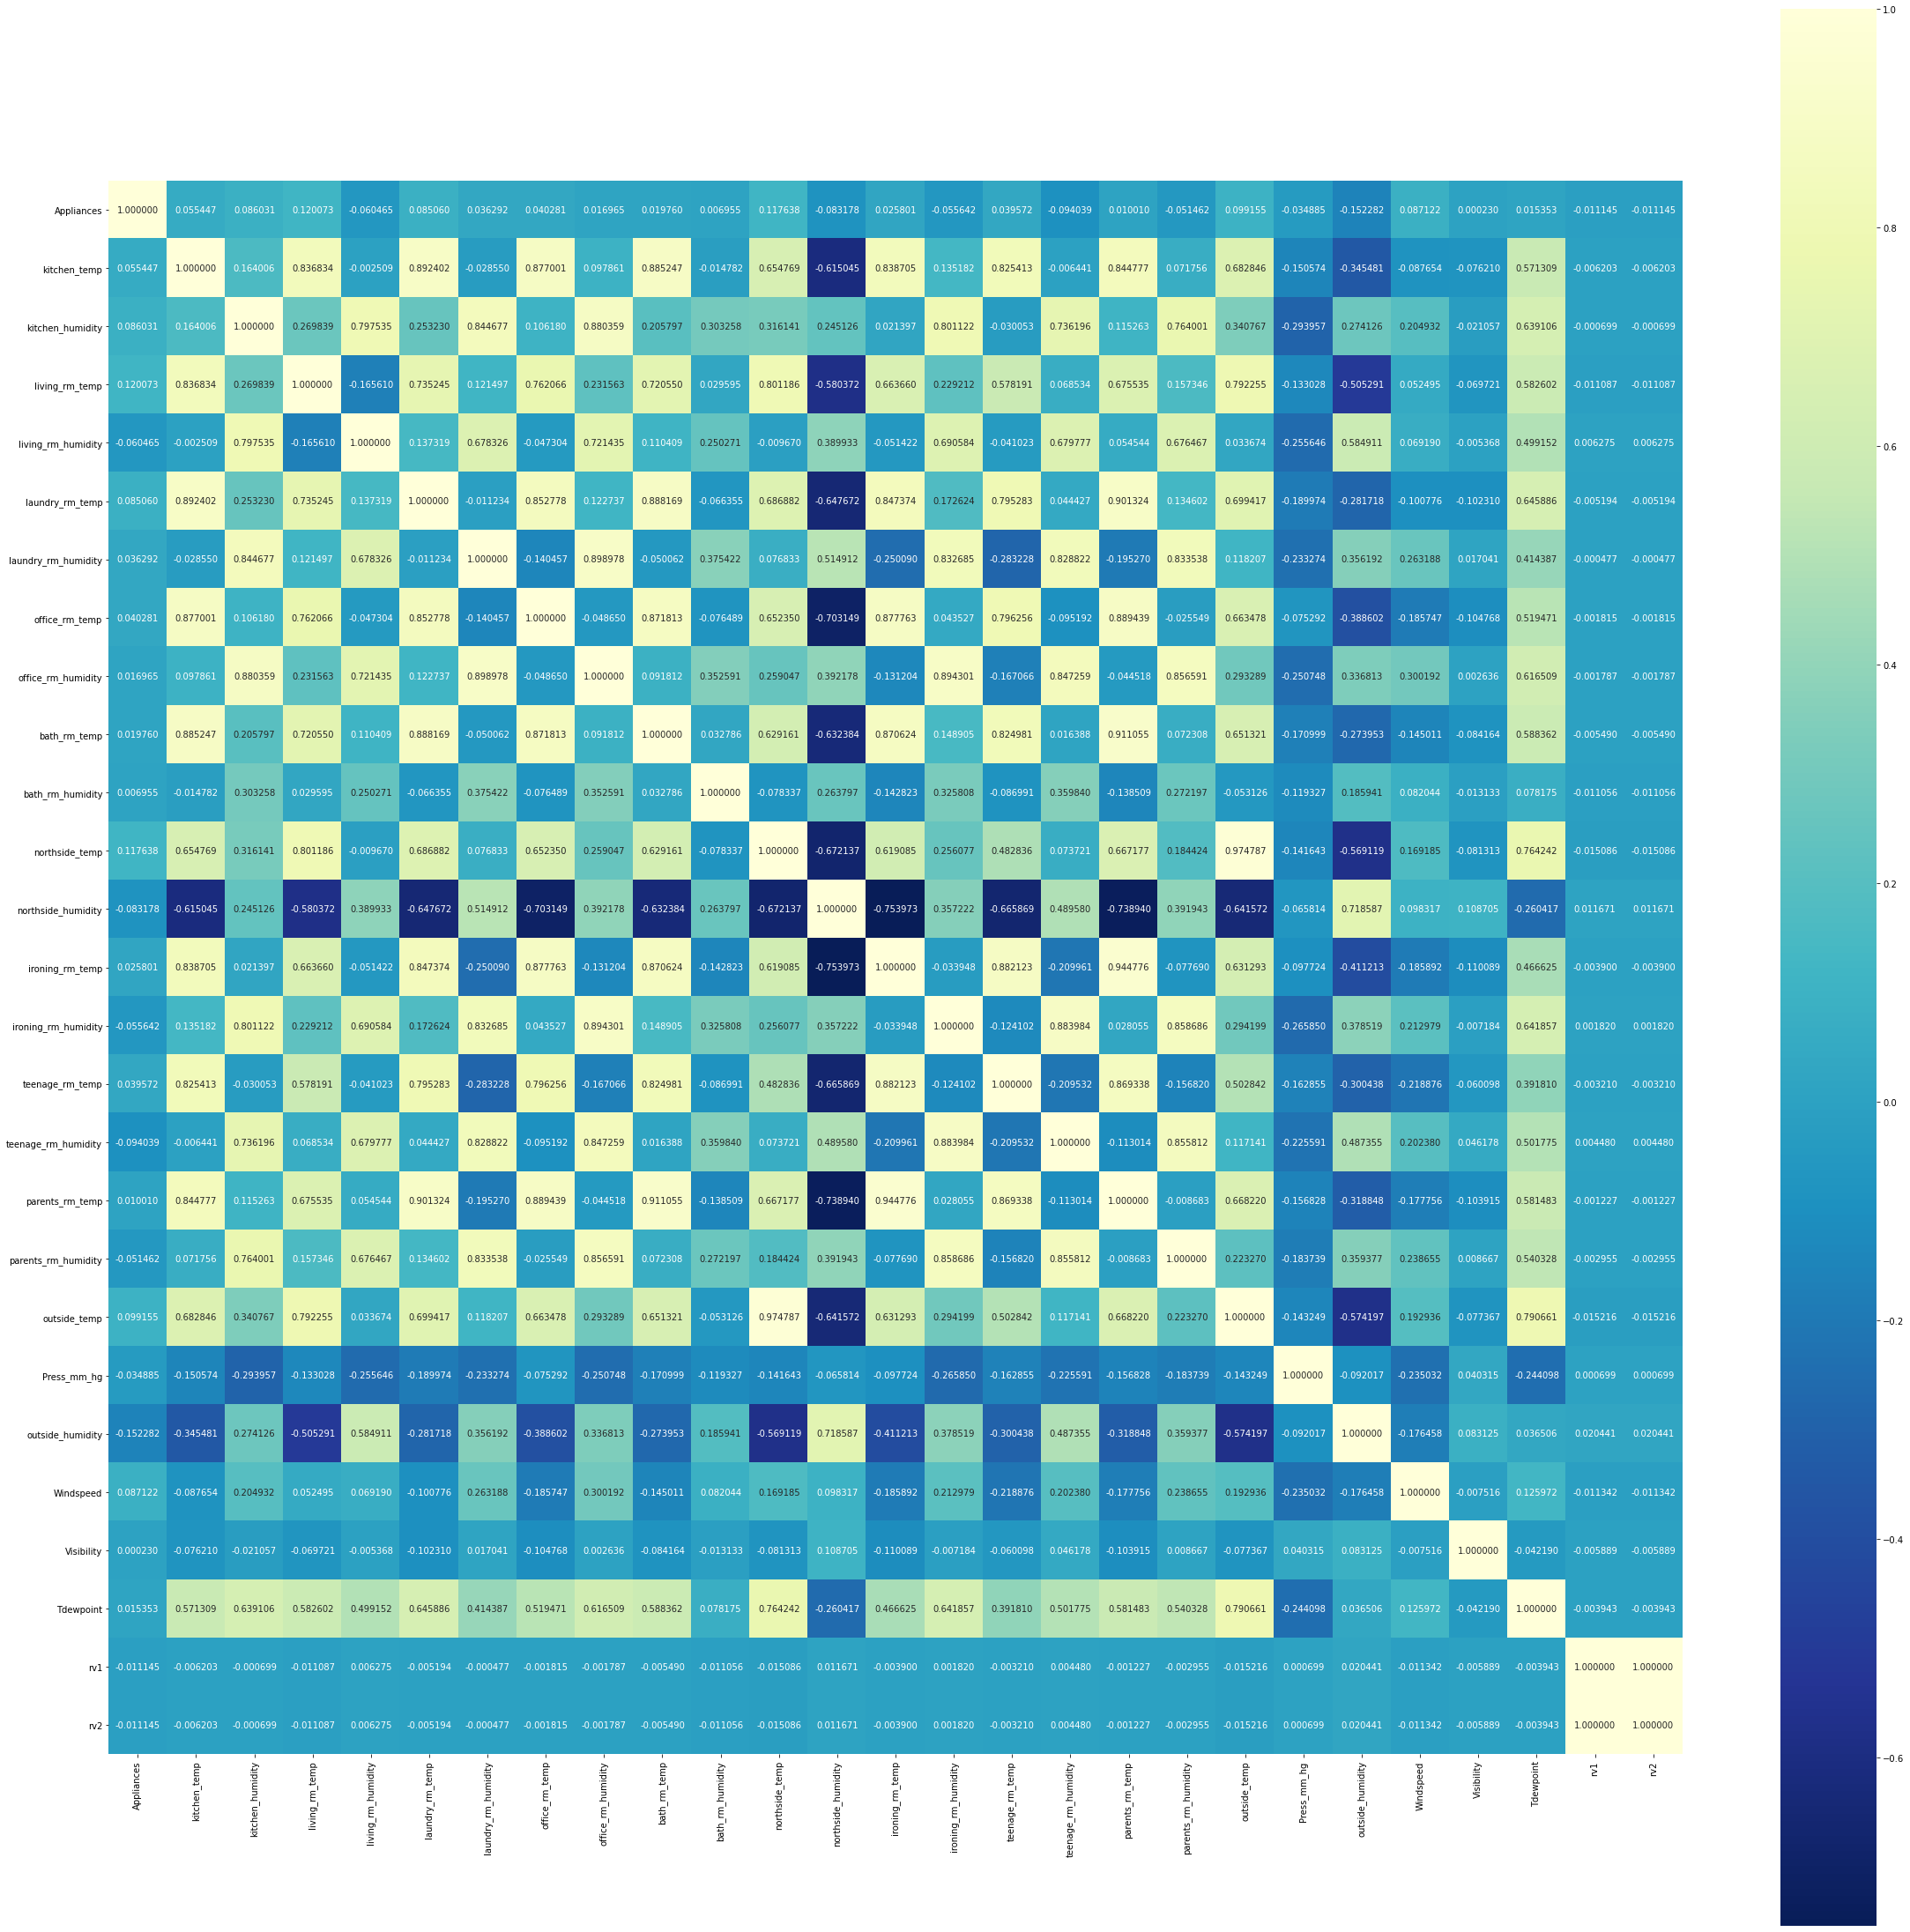

In [14]:
#plotting the heatmap showing the correlation between features

plt.figure(figsize= (40,40))
sns.heatmap(corr, cbar=True, square=True,  annot=True, fmt='1f', cmap='YlGnBu_r')

Checking the relationship between the target variable(Appliances) and all indoor temperatures

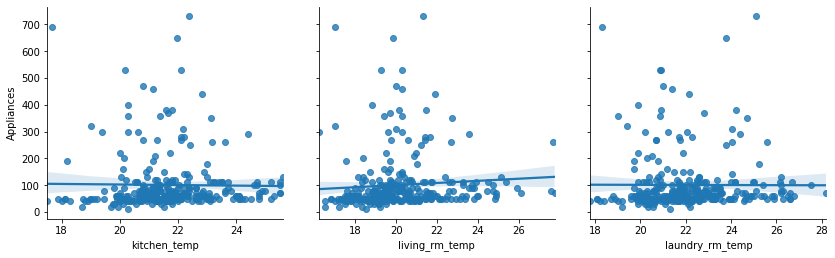

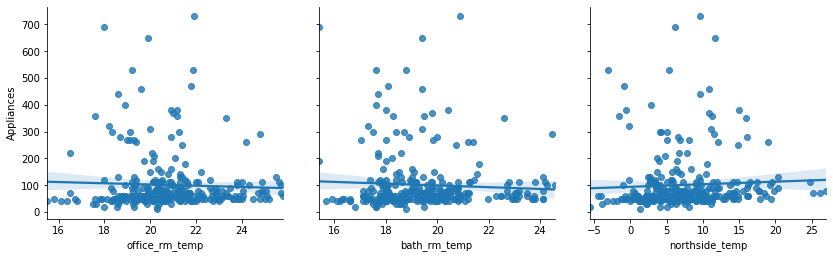

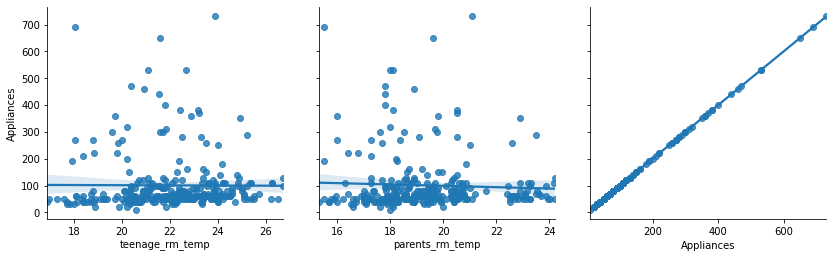

In [16]:
plot_columns = ['kitchen_temp', 'living_rm_temp', 'laundry_rm_temp',
                'office_rm_temp', 'bath_rm_temp', 'northside_temp',
                 'teenage_rm_temp', 'parents_rm_temp','Appliances']


plot_data = data_set[plot_columns].sample(300, random_state=1)
g_1 = sns.PairGrid(plot_data, y_vars=['Appliances'], x_vars=plot_columns[0:3], height=4, layout_pad=2)
g_2 = sns.PairGrid(plot_data, y_vars=['Appliances'], x_vars=plot_columns[3:6], height=4, layout_pad=2)
g_3 = sns.PairGrid(plot_data, y_vars=['Appliances'], x_vars=plot_columns[6:9], height=4, layout_pad=2, )
g_1.map(sns.regplot)
g_2.map(sns.regplot)
g_3.map(sns.regplot)
  

Getting the correlation between the Target variable(Appliances) and the Feature variables

In [17]:
data_set[data_set.columns[:]].corr()['Appliances']

Appliances             1.000000
kitchen_temp           0.055447
kitchen_humidity       0.086031
living_rm_temp         0.120073
living_rm_humidity    -0.060465
laundry_rm_temp        0.085060
laundry_rm_humidity    0.036292
office_rm_temp         0.040281
office_rm_humidity     0.016965
bath_rm_temp           0.019760
bath_rm_humidity       0.006955
northside_temp         0.117638
northside_humidity    -0.083178
ironing_rm_temp        0.025801
ironing_rm_humidity   -0.055642
teenage_rm_temp        0.039572
teenage_rm_humidity   -0.094039
parents_rm_temp        0.010010
parents_rm_humidity   -0.051462
outside_temp           0.099155
Press_mm_hg           -0.034885
outside_humidity      -0.152282
Windspeed              0.087122
Visibility             0.000230
Tdewpoint              0.015353
rv1                   -0.011145
rv2                   -0.011145
Name: Appliances, dtype: float64

# **Data Preprocessing**

In [18]:
#Scaling the features using MinMax Scaler

from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()

#normalising the dataset
normalised_ds= pd.DataFrame(scaler.fit_transform(data_set), columns=data_set.columns)

In [19]:
#Splitting the dataset into Target Variable(dependent) and Feature Variable(indepedent)

#independent
features= normalised_ds.drop(['Appliances'], axis=1)

#dependent
target= normalised_ds['Appliances']

In [20]:
#splitting the data into training and test set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(features, target, test_size=0.3, random_state=42)

print('Size of training set:', x_train.shape)
print('Size of test set:', x_test.shape)

Size of training set: (13814, 26)
Size of test set: (5921, 26)


# **Machine Learning**
**Models**

*   Multiple Linear Regression (MLR)
*   Ridge Regression
*   Lasso Regression







In [21]:
#import library for linear regression

from sklearn.linear_model import LinearRegression 

#creating a classifier

linear_model= LinearRegression()

#training the model

linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
#predicition on test data

y_pred= linear_model.predict(x_test)

**Performance Evaluation-MLR**

In [24]:
#import the evaluation metrics

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np
#MAE

M_A_E= mean_absolute_error(y_test, y_pred)
R2= r2_score(y_test, y_pred)
M_S_E= mean_squared_error(y_test, y_pred)
R_M_S_E= np.sqrt(mean_squared_error(y_test, y_pred))

print(round(M_A_E, 3))
print(round(R2, 3))
print(round(M_S_E, 3))
print(round(R_M_S_E, 3))

0.05
0.149
0.008
0.088


**Cross Validation of Scores**

In [43]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model, x_train, y_train, cv=5,scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [44]:
#linear regression 

get_cv_scores(linear_model)

CV Mean:  0.13991398403229283
STD:  0.020236535679680367




**Intercept and Coefficient**

{'Intercept': 0.1529029588225302}


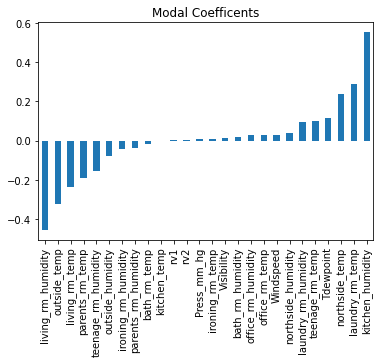

In [25]:
#finding the intercept and slope 

print({'Intercept': linear_model.intercept_}) #intercept 

from pandas import Series
predictors=x_train.columns
coef=Series(linear_model.coef_, predictors).sort_values()
coef.plot(kind='bar',title='Modal Coefficents')

From the bar plot, the coefficients of kitchen humidity is higher compared to the rest showing that the kitchen humidity influences the appliances 

**Penalizing- Regularization methods**

Ridge Regression

In [66]:
#importing the necessary libraries

from sklearn.linear_model import Ridge
ridgeReg= Ridge(alpha=0.5)

#training
ridgeReg.fit(x_train,y_train)


Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [67]:
#predicting
y_ridge=ridgeReg.predict(x_test)

**Performance Evaluation**- Ridge Regression

In [68]:
M_A_E_RR= mean_absolute_error(y_test, y_ridge)
R2_RR= r2_score(y_test, y_ridge)
M_S_E_RR= mean_squared_error(y_test, y_ridge)
R_M_S_E_RR= np.sqrt(mean_squared_error(y_test, y_ridge))

print(round(M_A_E_RR, 3))
print(round(R2_RR, 3))
print(round(M_S_E_RR, 3))
print(round(R_M_S_E_RR, 3))

0.05
0.148
0.008
0.088


In [69]:
#Ridge Regression Scores
get_cv_scores(ridgeReg)

CV Mean:  0.1396371608013382
STD:  0.019631284313537386




**Lasso Regression**

In [29]:
# importing the necessary libraries

from sklearn.linear_model import Lasso
lassoReg= Lasso(alpha=0.001)

#training
lassoReg.fit(x_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [31]:
#predicting

y_lasso= lassoReg.predict(x_test)

**Performance Evaluation**- Lasso 

In [32]:
M_A_E_LR= mean_absolute_error(y_test, y_lasso)
R2_LR= r2_score(y_test, y_lasso)
M_S_E_LR= mean_squared_error(y_test, y_lasso)
R_M_S_E_LR= np.sqrt(mean_squared_error(y_test, y_lasso))

print(round(M_A_E_LR, 3))
print(round(R2_LR, 3))
print(round(M_S_E_LR, 3))
print(round(R_M_S_E_LR, 3))

0.055
0.027
0.009
0.094


In [46]:
get_cv_scores(lassoReg)

CV Mean:  0.024134662271246898
STD:  0.002573025900327592




**Comapring Linear, Ridge and Lasso Regression**

In [70]:
#comparing the effects of regularisation using the weights

#this function returns the weight of each feature
def get_weights_df(model, feat, col_name):
  weights=pd.Series(model.coef_, feat.columns).sort_values()
  weights_df=pd.DataFrame(weights).reset_index()
  weights_df.columns=['Features', col_name]
  weights_df[col_name].round(3)
  return weights_df


linear_model_weights= get_weights_df(linear_model,x_train,'Linear_Model_Weight')
ridge_weights_df= get_weights_df(ridgeReg, x_train,'Ridge_Weight')
lasso_weights_df= get_weights_df(lassoReg,x_train,'Lasso_Weight')

final_weights=pd.merge(linear_model_weights,ridge_weights_df, on='Features')
final_weights=pd.merge(final_weights, lasso_weights_df, on='Features')

final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_Weight
0,living_rm_humidity,-0.456698,-0.401134,-0.000000
1,outside_temp,-0.321860,-0.250765,0.000000
2,living_rm_temp,-0.236178,-0.193880,0.000000
3,parents_rm_temp,-0.189941,-0.188584,-0.000000
4,teenage_rm_humidity,-0.157595,-0.156596,-0.000110
5,outside_humidity,-0.077671,-0.050541,-0.049557
6,ironing_rm_humidity,-0.044614,-0.046291,-0.000000
7,parents_rm_humidity,-0.039800,-0.041701,-0.000000
8,bath_rm_temp,-0.015657,-0.020727,-0.000000
9,kitchen_temp,-0.003281,-0.021549,0.000000


# **Hyper Parameter Tuning**

Introducing **GridSearchCV**

**Ridge Regression**- We decide to give alpha a range of values in order to select the best hyper paramter for the model

In [72]:
# importing the Grid package

from sklearn.model_selection import GridSearchCV

#we have already imported ridge from our previous regularization

parameters_ridge={'alpha':[0.001, 0.01, 0.1,0.2,0.3,0.4,0.5,0.6]}

grid_ridge= GridSearchCV(ridgeReg, parameters_ridge, scoring='r2', verbose=1, n_jobs=1)
grid_result1= grid_ridge.fit(x_train, y_train)

print('Best Params:', grid_result1.best_params_)
print('Best Score:', grid_result1.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best Params: {'alpha': 0.1}
Best Score: 0.13993006179307693


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    0.4s finished


**Lasso Regression**-Adopt same method used in ridge grid search 

In [73]:
#we have already imported the Grid package from grid ridge and lasso from previous regularization

param_lasso={'alpha':[0.001, 0.01, 0.05, 0.1, 1, 10, 100]}


grid_lasso= GridSearchCV(lassoReg, param_lasso, scoring='r2', verbose=1, n_jobs=-1)
grid_result2= grid_lasso.fit(x_train, y_train)

print('Best Params:', grid_result2.best_params_)
print('Best Score:', grid_result2.best_score_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Best Params: {'alpha': 0.001}
Best Score: 0.024134662271246898


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:    1.8s finished
